# Feature Scaling and Normalization - Lab

## Introduction
In this lab, you'll practice your feature scaling and normalization skills!

## Objectives
You will be able to:
* Identify if it is necessary to perform log transformations on a set of features
* Perform log transformations on different features of a dataset
* Determine if it is necessary to perform normalization/standardization for a specific model or set of data
* Compare the different standardization and normalization techniques
* Use standardization/normalization on features of a dataset

## Back to the Ames Housing data

Let's import our Ames Housing data.

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

ames = pd.read_csv('ames.csv')

## Look at the histograms for the continuous variables

Since there are so many features it is helpful to filter the columns by datatype and number of unique values. A heuristic you might use to select continous variables might be a combination of features that are not object datatypes and have at least a certain amount of unique values.

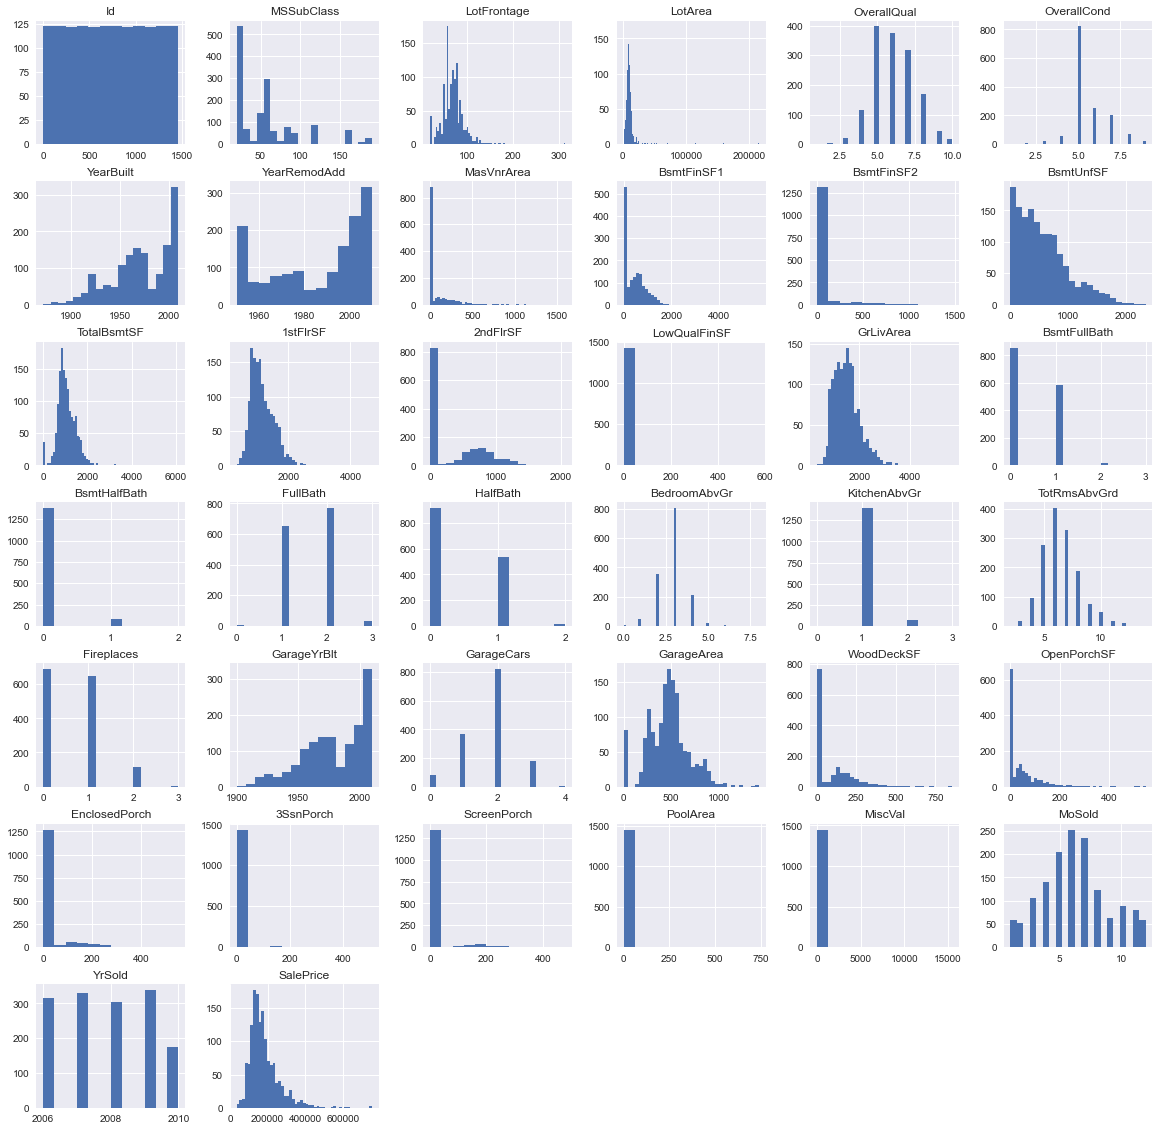

In [51]:
# Your code here
ames.hist(figsize=(20,20), bins='auto');

In [52]:
cols = []

for column in ames.columns:
    if ames[column].dtype != 'object':
        cols.append((ames[column].nunique(), column))
display(sorted(cols))

[(3, 'BsmtHalfBath'),
 (3, 'HalfBath'),
 (4, 'BsmtFullBath'),
 (4, 'Fireplaces'),
 (4, 'FullBath'),
 (4, 'KitchenAbvGr'),
 (5, 'GarageCars'),
 (5, 'YrSold'),
 (8, 'BedroomAbvGr'),
 (8, 'PoolArea'),
 (9, 'OverallCond'),
 (10, 'OverallQual'),
 (12, 'MoSold'),
 (12, 'TotRmsAbvGrd'),
 (15, 'MSSubClass'),
 (20, '3SsnPorch'),
 (21, 'MiscVal'),
 (24, 'LowQualFinSF'),
 (61, 'YearRemodAdd'),
 (76, 'ScreenPorch'),
 (97, 'GarageYrBlt'),
 (110, 'LotFrontage'),
 (112, 'YearBuilt'),
 (120, 'EnclosedPorch'),
 (144, 'BsmtFinSF2'),
 (202, 'OpenPorchSF'),
 (274, 'WoodDeckSF'),
 (327, 'MasVnrArea'),
 (417, '2ndFlrSF'),
 (441, 'GarageArea'),
 (637, 'BsmtFinSF1'),
 (663, 'SalePrice'),
 (721, 'TotalBsmtSF'),
 (753, '1stFlrSF'),
 (780, 'BsmtUnfSF'),
 (861, 'GrLivArea'),
 (1073, 'LotArea'),
 (1460, 'Id')]

In [53]:
ames[ames['ScreenPorch'] > 0]['ScreenPorch']

12      176
46      198
72      291
80      252
93       99
       ... 
1408    168
1414    220
1420    119
1421    165
1443     40
Name: ScreenPorch, Length: 116, dtype: int64

We can see from our histogram of the contiuous features that there are many examples where there are a ton of zeros. For example, WoodDeckSF (square footage of a wood deck) gives us a positive number indicating the size of the deck and zero if no deck exists. It might have made sense to categorize this variable to "deck exists or not (binary variable 1/0). Now you have a zero-inflated variable which is cumbersome to work with.

Lets drop these zero-inflated variables for now and select the features which don't have this characteristic.

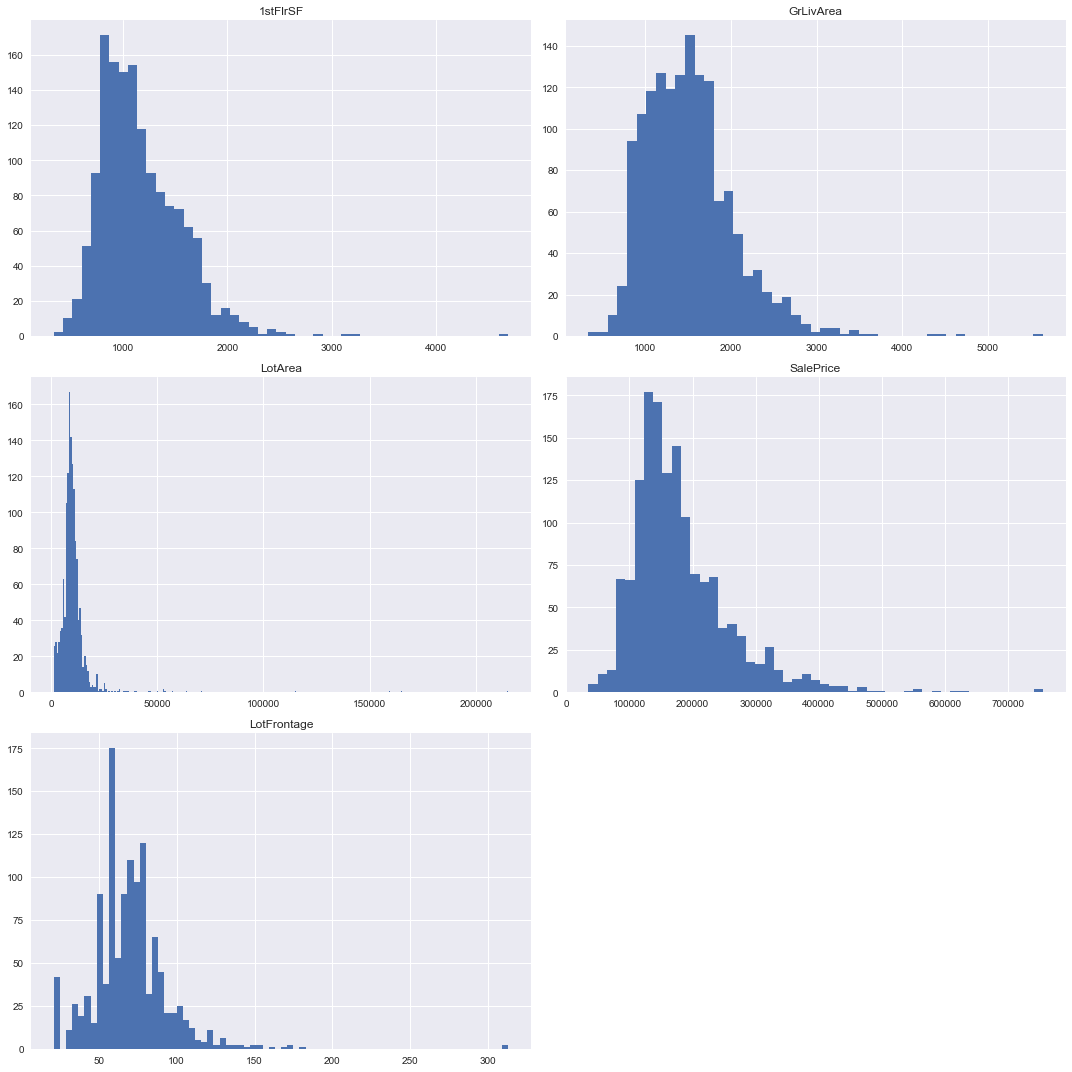

In [54]:
# Select non zero-inflated continuous features as ames_cont
ames_cont = ['1stFlrSF', 'GrLivArea', 'LotArea', 'SalePrice', 'LotFrontage']
ames[ames_cont].hist(figsize=(15,15), bins='auto')
plt.tight_layout();

## Perform log transformations for the variables where it makes sense

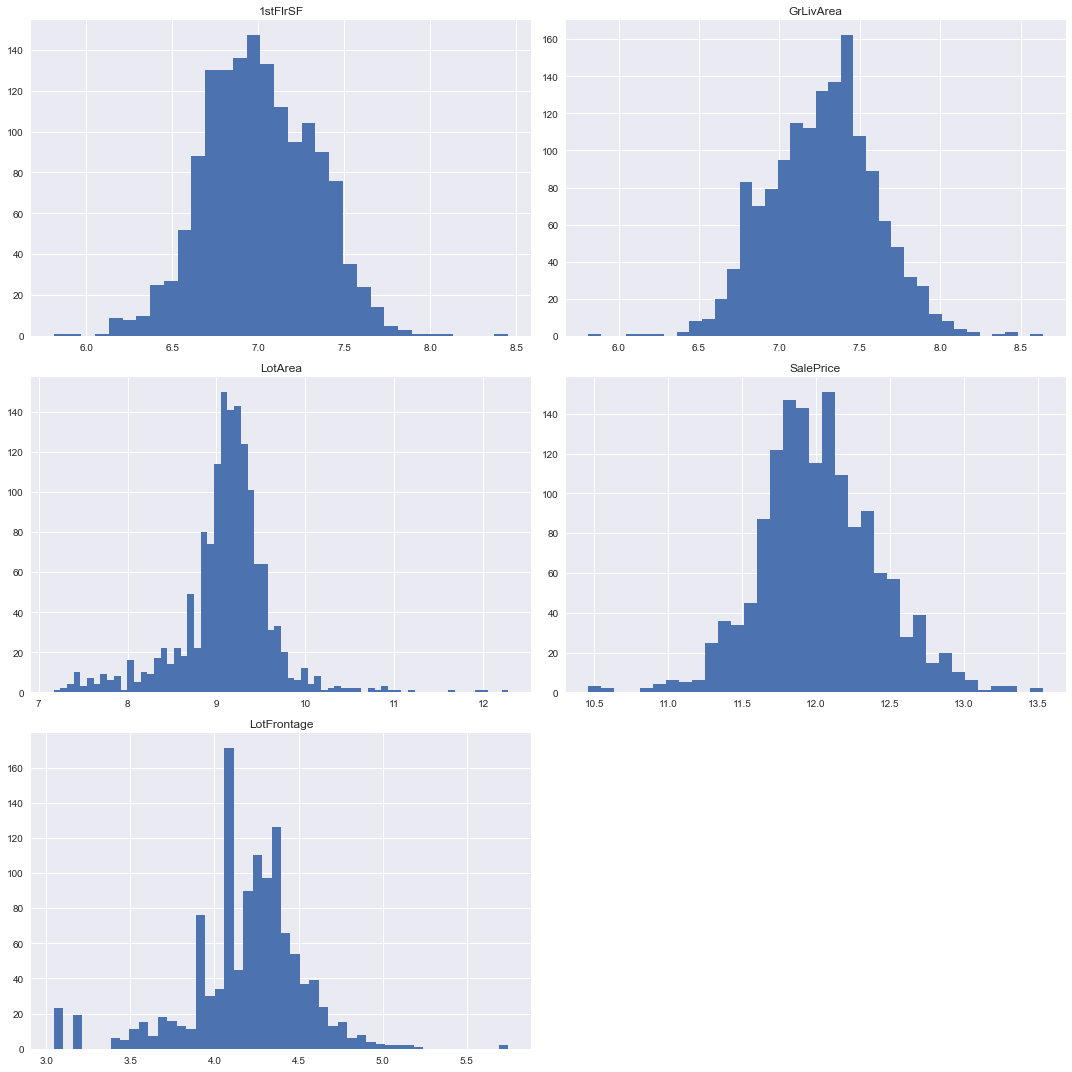

In [55]:
# Your code here
import numpy as np

ames2 = ames[ames_cont].copy()
for feat in ames_cont:
    ames2[feat] = np.log(ames2[feat])
ames2.hist(figsize=(15,15), bins='auto')
plt.tight_layout();

## Standardize the continuous variables

Store your final features in a DataFrame `features_final`: 

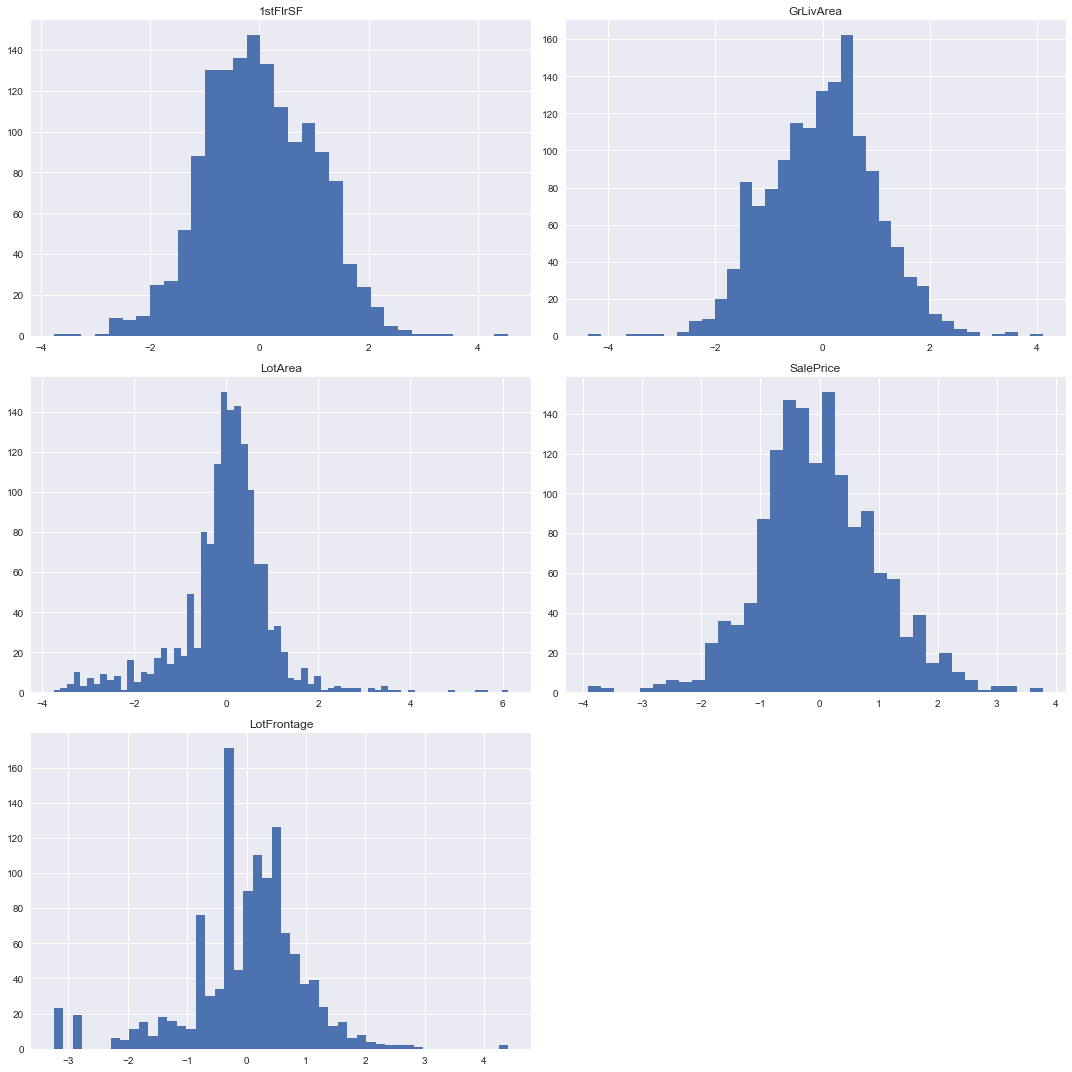

In [56]:
# Your code here
features_final = ames2.apply(lambda feat: (feat - feat.mean()) / feat.std())

features_final.hist(figsize=(15,15), bins='auto')
plt.tight_layout();

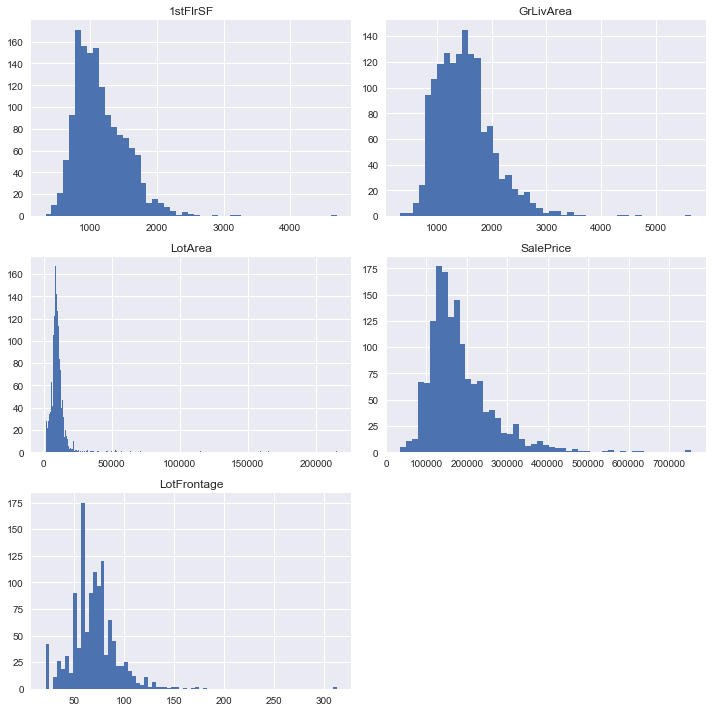

In [57]:
# Original for contrast

ames[ames_cont].hist(figsize=(10,10), bins='auto')
plt.tight_layout();

## Summary
Great! You've now got some hands-on practice transforming data using log transforms, feature scaling, and normalization!